In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('train.txt',sep=';',header=None,names=['text','emotions'])
df.head()

,text,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [53]:
df.isnull().sum()

text        0
emotions    0
dtype: int64

<Axes: xlabel='emotions'>

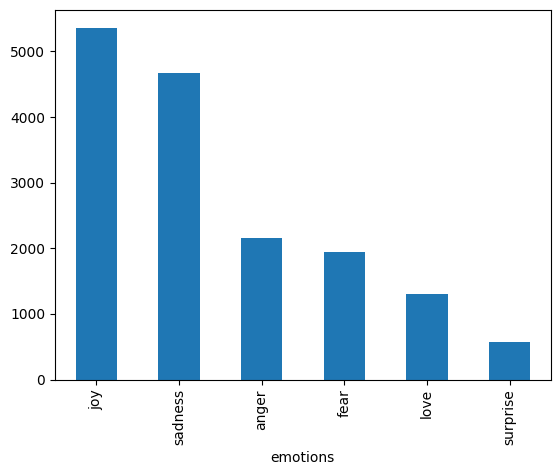

In [54]:
df['emotions'].value_counts().plot(kind='bar')

In [55]:
unique = df['emotions'].unique()
emotion_count = {}
i=0
for emotion in unique:
    emotion_count[emotion] = i
    i+=1
df['label'] = df['emotions'].map(emotion_count)
df.head()

,text,emotions,label
0,i didnt feel humiliated,sadness,0
1,i can go from feeling so hopeless to so damned...,sadness,0
2,im grabbing a minute to post i feel greedy wrong,anger,1
3,i am ever feeling nostalgic about the fireplac...,love,2
4,i am feeling grouchy,anger,1


Convert Dtata to lowercase

In [56]:
df['text'] = df['text'].str.lower()

In [57]:
df.head()

,text,emotions,label
0,i didnt feel humiliated,sadness,0
1,i can go from feeling so hopeless to so damned...,sadness,0
2,im grabbing a minute to post i feel greedy wrong,anger,1
3,i am ever feeling nostalgic about the fireplac...,love,2
4,i am feeling grouchy,anger,1


More Text Cleaning

In [58]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [59]:
df['text']= df['text'].apply(remove_punctuation)
df.head()

,text,emotions,label
0,i didnt feel humiliated,sadness,0
1,i can go from feeling so hopeless to so damned...,sadness,0
2,im grabbing a minute to post i feel greedy wrong,anger,1
3,i am ever feeling nostalgic about the fireplac...,love,2
4,i am feeling grouchy,anger,1


Remove numbers

In [60]:
def remove_numbers(text):
    return ''.join([i for i in text if not i.isdigit()])
df['text'] = df['text'].apply(remove_numbers)
df.head()


,text,emotions,label
0,i didnt feel humiliated,sadness,0
1,i can go from feeling so hopeless to so damned...,sadness,0
2,im grabbing a minute to post i feel greedy wrong,anger,1
3,i am ever feeling nostalgic about the fireplac...,love,2
4,i am feeling grouchy,anger,1


NO links or tags to remove

Removing Stopwords

In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt', download_dir=r"R:\Gen AI\myenvLLM\nltk_data")
nltk.download('stopwords', download_dir=r"R:\Gen AI\myenvLLM\nltk_data")


[nltk_data] Downloading package punkt to R:\Gen
[nltk_data]     AI\myenvLLM\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to R:\Gen
[nltk_data]     AI\myenvLLM\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
stopwords_list = stopwords.words('english')
stopwords_list

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [63]:
len(stopwords_list)

198

In [64]:
def remove(txt):
    word_tokens = txt.split()
    filtered_sentence = [w for w in word_tokens if not w in stopwords_list]
    return ' '.join(filtered_sentence)

In [65]:
df['text'] = df['text'].apply(remove)
df.head()

,text,emotions,label
0,didnt feel humiliated,sadness,0
1,go feeling hopeless damned hopeful around some...,sadness,0
2,im grabbing minute post feel greedy wrong,anger,1
3,ever feeling nostalgic fireplace know still pr...,love,2
4,feeling grouchy,anger,1


Getting into Vectorizatio:

Using BOW (Count Vectorizer) or Other method 

In [66]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['emotions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Convert X train to vectors via tfidf or BOW

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer



In [74]:
BOW = CountVectorizer()
X_train_bow = BOW.fit_transform(X_train)
X_test_bow = BOW.transform(X_test)

Done with BOW vectorization

best model for NLP is Naive Bayes , LR

In [76]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model.fit(X_train_bow, y_train)
y_pred = model.predict(X_test_bow)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))     


Accuracy: 0.768125
              precision    recall  f1-score   support

       anger       0.89      0.63      0.74       427
        fear       0.85      0.57      0.68       397
         joy       0.73      0.96      0.83      1021
        love       0.93      0.27      0.41       296
     sadness       0.75      0.95      0.84       946
    surprise       1.00      0.05      0.10       113

    accuracy                           0.77      3200
   macro avg       0.86      0.57      0.60      3200
weighted avg       0.80      0.77      0.74      3200

[[271  13  56   0  87   0]
 [ 15 226  69   0  87   0]
 [  4   2 977   2  36   0]
 [  6   4 156  79  51   0]
 [  8   4  32   3 899   0]
 [  0  17  49   1  40   6]]


In [77]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



In [78]:
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6609375
              precision    recall  f1-score   support

       anger       0.93      0.29      0.44       427
        fear       0.92      0.22      0.36       397
         joy       0.60      0.99      0.74      1021
        love       1.00      0.03      0.06       296
     sadness       0.70      0.93      0.80       946
    surprise       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.86      0.41      0.40      3200
weighted avg       0.76      0.66      0.58      3200

[[ 123    2  157    0  145    0]
 [   8   88  164    0  137    0]
 [   0    0 1011    0   10    0]
 [   1    1  237    9   48    0]
 [   0    2   61    0  883    0]
 [   0    3   68    0   41    1]]


In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)

model_lr.fit(X_train_bow, y_train)
y_pred_lr = model_lr.predict(X_test_bow)


In [84]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy with BoW:", accuracy_lr)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))



Logistic Regression Accuracy with BoW: 0.8896875

Classification Report:
              precision    recall  f1-score   support

       anger       0.89      0.86      0.87       427
        fear       0.86      0.84      0.85       397
         joy       0.88      0.94      0.91      1021
        love       0.85      0.76      0.80       296
     sadness       0.93      0.93      0.93       946
    surprise       0.86      0.73      0.79       113

    accuracy                           0.89      3200
   macro avg       0.88      0.84      0.86      3200
weighted avg       0.89      0.89      0.89      3200



In [85]:
model_lr.fit(X_train_tfidf,y_train)
y_pred_lr_tfidf = model_lr.predict(X_test_tfidf)
accuracy_lr_tfidf = accuracy_score(y_test, y_pred_lr_tfidf)
print("Logistic Regression Accuracy with TF-IDF:", accuracy_lr_tfidf)


Logistic Regression Accuracy with TF-IDF: 0.8628125


In [86]:
print("\nClassification Report with TF-IDF:")
print(classification_report(y_test, y_pred_lr_tfidf))


Classification Report with TF-IDF:
              precision    recall  f1-score   support

       anger       0.90      0.81      0.86       427
        fear       0.86      0.76      0.81       397
         joy       0.81      0.96      0.88      1021
        love       0.90      0.61      0.73       296
     sadness       0.90      0.94      0.92       946
    surprise       0.88      0.47      0.61       113

    accuracy                           0.86      3200
   macro avg       0.88      0.76      0.80      3200
weighted avg       0.87      0.86      0.86      3200

